# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx

# Misc Methods

In [2]:
def head(a: dict, i: int) -> dict:
  return dict(list(a.items())[0:i])

In [3]:
def drawColored(G: nx.Graph, coloring: dict):
  #Create drawable color_list from coloring in the right order
  color_list = []
  for node in G.nodes:
    color_list.append(coloring.get(node))

  #Draw colored graph with color_list
  plt.figure()
  nx.draw(G, node_color=color_list, with_labels=True)
  plt.show()

In [4]:
def numberOfColors(coloring: dict) -> int:
  #Create drawable color_list from coloring in the right order
  color_list = []
  for key in coloring.keys():
    color_list.append(coloring.get(key))
  return len(set(color_list))

In [5]:
#Read reddit text file data
def readRedditData():
    file = open('data/reddit_edges.txt', 'r')
    global edges
    edges = []
    for line in file.readlines():
        edges.append((line.split()[0], line.split()[1]))
    file.close()
    file = open('data/reddit_vertices.txt', 'r')
    global vertices
    vertices = []
    for line in file.readlines():
        vertices.append(line.strip())
    file.close()

# Data acquisition

In [6]:
readRedditData()

In [7]:
vertices[0:20]

['glitch_art',
 'tuscaloosa',
 'manwhorepodcast',
 'simplebanking',
 'ryan',
 'stunfisk',
 'trillek',
 'nsfw_korea',
 'dubaiclassifieds',
 'basingstoke',
 'gtd',
 'ideasfortifu',
 'nmsportals',
 'trump',
 'destionationtest',
 'littlepersonals',
 'wisconsingo',
 'redditpersonality',
 'vapewild',
 'letsencrypt']

In [8]:
edges[0:20]

[('leagueoflegends', 'teamredditteams'),
 ('theredlion', 'soccer'),
 ('inlandempire', 'bikela'),
 ('nfl', 'cfb'),
 ('playmygame', 'gamedev'),
 ('dogemarket', 'dogecoin'),
 ('locationbot', 'legaladvice'),
 ('indiefied', 'aww'),
 ('posthardcore', 'bestof2013'),
 ('posthardcore', 'corejerk'),
 ('gfycat', 'india'),
 ('metalcore', 'bestof2013'),
 ('metalcore', 'corejerk'),
 ('suicidewatch', 'offmychest'),
 ('dogecoin', 'novacoin'),
 ('gaming4gamers', 'fallout'),
 ('kpop', 'dota2'),
 ('airsoft', 'airsoftmarket'),
 ('circlebroke', 'childfree'),
 ('tribes', 'games')]

# Networkx greedy coloring and drawing

In [9]:
#Create empty graph
G = nx.Graph()

In [10]:
#Add vertices and edges
#Note that adding edges between vertices not yet in the graph will add those vertices

#G.add_nodes_from(vertices)
G.add_edges_from(edges[0:40])

print(str(len(G.nodes)) + " nodes")
print(str(len(G.edges)) + " edges")

68 nodes
40 edges


In [11]:
#Compute coloring
coloring = nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
head(coloring, 20)

{'bestof2013': 0,
 'corejerk': 1,
 'todayilearned': 0,
 'askreddit': 1,
 'dogecoin': 0,
 'posthardcore': 2,
 'metalcore': 2,
 'funny': 0,
 'leagueoflegends': 0,
 'teamredditteams': 1,
 'theredlion': 0,
 'soccer': 1,
 'inlandempire': 0,
 'bikela': 1,
 'nfl': 0,
 'cfb': 1,
 'playmygame': 0,
 'gamedev': 1,
 'dogemarket': 1,
 'locationbot': 0}

In [12]:
print(str(numberOfColors(coloring)) + " colors used")

3 colors used


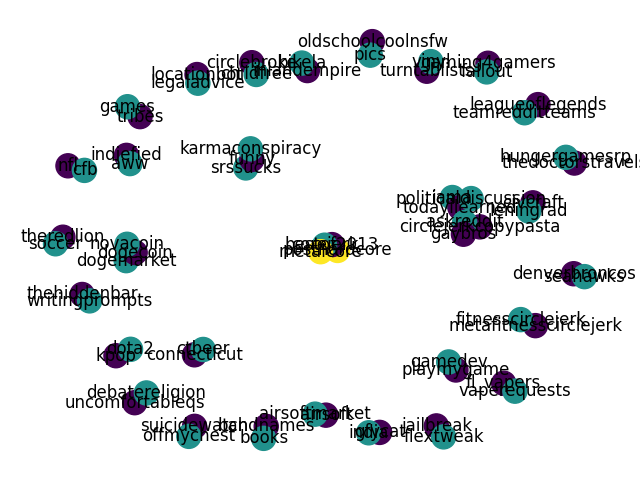

In [13]:
#Draw graph with colors
drawColored(G, coloring)